# blend two images of different of different size

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

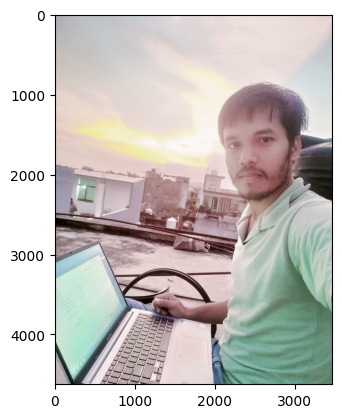

In [5]:
small_size = cv2.imread("small-image.jpg")
small_size = cv2.cvtColor(small_size,cv2.COLOR_BGR2RGB)
plt.imshow(small_size)

In [6]:
small_size.shape

(4624, 3468, 3)

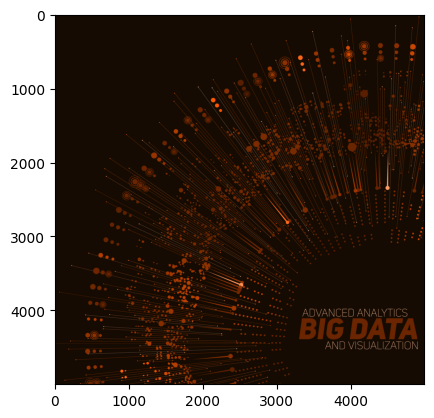

In [7]:
large_size = cv2.imread("larg-image.jpg")
large_size = cv2.cvtColor(large_size,cv2.COLOR_BGR2RGB)
plt.imshow(large_size)

In [8]:
large_size.shape

(5000, 5000, 3)

In [9]:
small_size.shape

(4624, 3468, 3)

In [10]:
x_offset = 5000 - 3468 
y_offset = 5000 - 4624

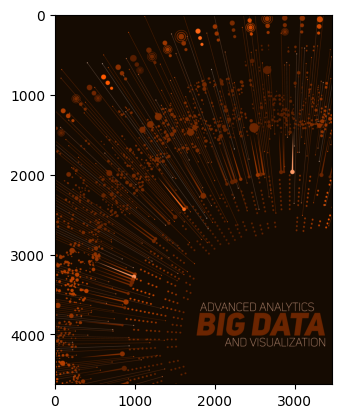

In [11]:
roi = large_size[y_offset:5000, x_offset:5000]
plt.imshow(roi)

In [12]:
roi.shape

(4624, 3468, 3)

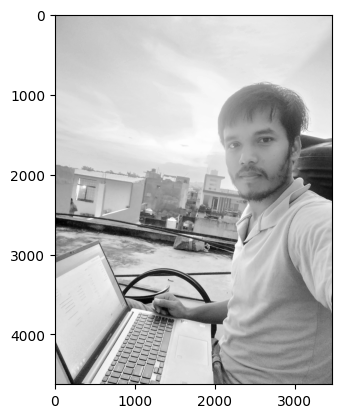

In [13]:
img2gray = cv2.cvtColor(small_size, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,cmap="gray")

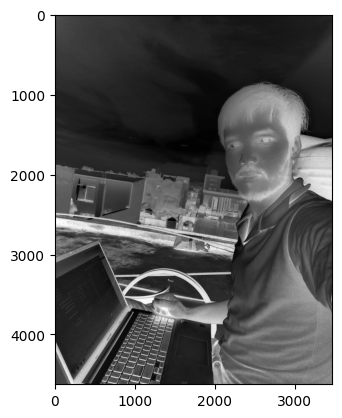

In [14]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap="gray")

In [15]:
mask_inv.shape

(4624, 3468)

In [16]:
small_size.shape

(4624, 3468, 3)

In [17]:
small_size.shape

(4624, 3468, 3)

In [18]:
white_img = np.full(small_size.shape, 255, dtype=np.uint8)
white_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

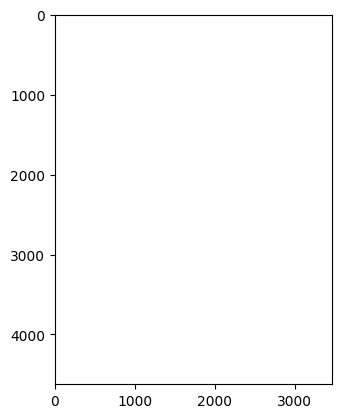

In [19]:
background = cv2.bitwise_or(white_img, white_img,mask=mask_inv)
plt.imshow(background)

In [176]:
background.shape

(4624, 3468, 3)

In [20]:
fg = cv2.bitwise_or(small_size, small_size, mask_inv)
fg.shape

(4624, 3468, 3)

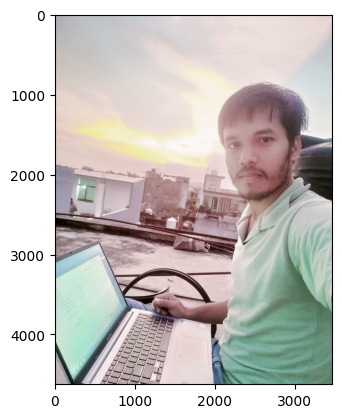

In [21]:
plt.imshow(fg)

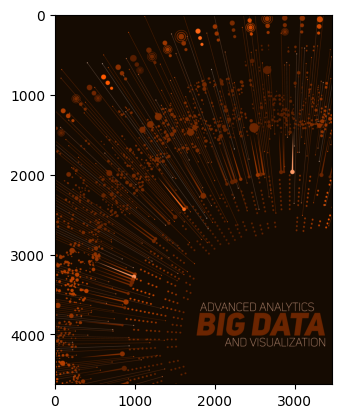

In [22]:
plt.imshow(roi)

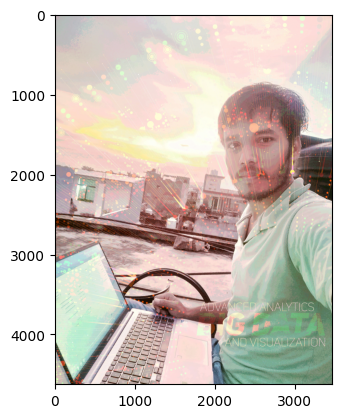

In [23]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

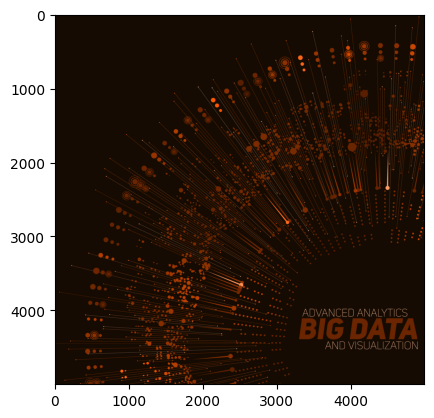

In [24]:
plt.imshow(large_size)

In [35]:
large_img = large_size.shape
small_img = final_roi



In [36]:
small_img.shape[0]

4624

In [37]:
small_img.shape[1]

3468

In [38]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

TypeError: 'tuple' object does not support item assignment